<div>
<img img class="logo" src="https://medialib.cmcdn.dk/medialibrary/51432DDB-BBE3-4327-85F4-BE3493077470/1D874B35-F493-EC11-84B2-00155D0B0901.png" style="width: 100px;" align="right">
</div>

# <center> Final Examination - CarSeats International

### <center> KAN-CDSCV1008U  Applied Machine Learning and Data Engineering in Business Context

In [1]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import shap

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [2]:
# Importing datasets 
path_fredrik = "C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedMachineLearning/Data/"
path_guest = ""

os.chdir(path_fredrik)
path = os.getcwd()
print(path)

df = pd.read_csv("Carseats.csv")
df.head()

C:\Users\fredr\OneDrive\Documents\Master\Semester_3\Applied ML\AppliedMachineLearning\Data


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
#checking for missing values
print(df.isna().sum())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


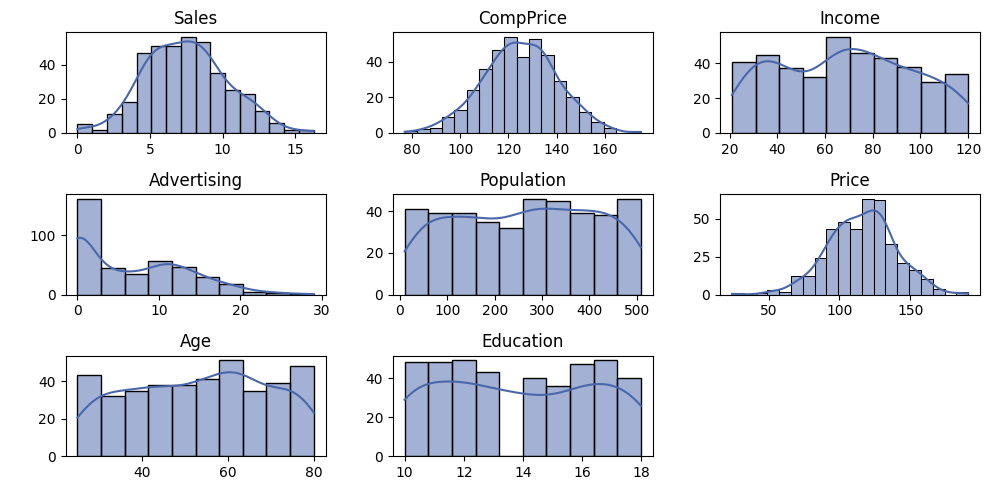

In [6]:
# Visualizing numerical features
num_features = df.select_dtypes(["float64", "int64"])

fig = plt.figure(figsize=(10, 5))

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(num_features):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for histplots
    ax = sns.histplot(data=num_features, x=j, color=custom_color, kde=True, bins='auto') 
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

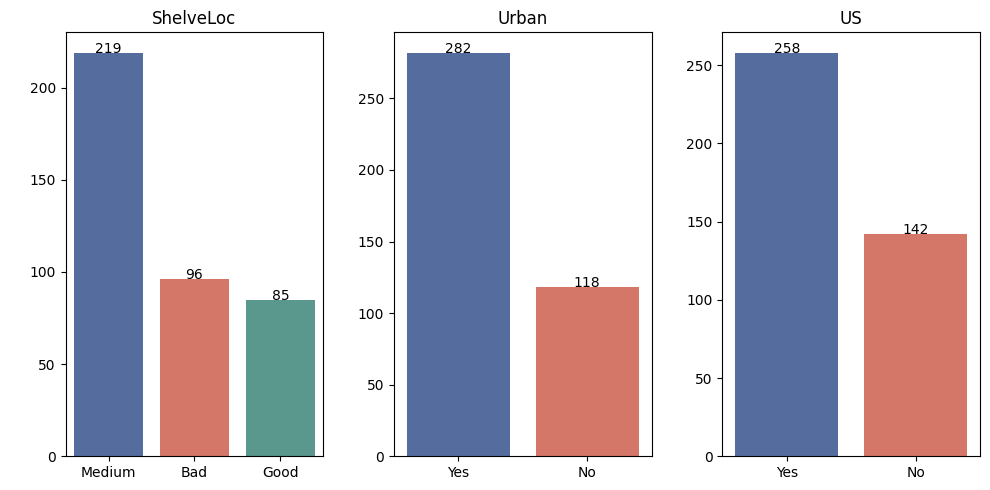

In [7]:
# Visualizing categorical features
cat_features = df.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

fig = plt.figure(figsize=(10, 5))

for i, j in enumerate(cat_features):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_df = df[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot using the custom color palette
    ax = sns.barplot(data=value_counts_df, x=value_counts_df.index, y=j, palette=custom_palette)
    
    # Create text annotations
    text = value_counts_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

### Data Preprocessing

In [8]:
# Copying the dataframe
df_clean = df.copy()
df_clean.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


`Label Encoding`

In [9]:
# Creating dummy features
df_clean = pd.get_dummies(df_clean, columns=['ShelveLoc'], prefix='ShelveLoc')
df_clean = pd.get_dummies(df_clean, columns=['Urban'], prefix='Urban')
df_clean = pd.get_dummies(df_clean, columns=['US'], prefix='US')
df_clean.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


`Pattern Recognition`

In [10]:
#correlation matrix to see which features are highly correlated to the churn feature
corr_matrix = df_clean.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales               1.000000
ShelveLoc_Good      0.500510
Advertising         0.269507
US_Yes              0.177093
Income              0.151951
CompPrice           0.064079
Population          0.050471
Urban_No            0.015419
Urban_Yes          -0.015419
Education          -0.051955
ShelveLoc_Medium   -0.073999
US_No              -0.177093
Age                -0.231815
ShelveLoc_Bad      -0.393167
Price              -0.444951
Name: Sales, dtype: float64

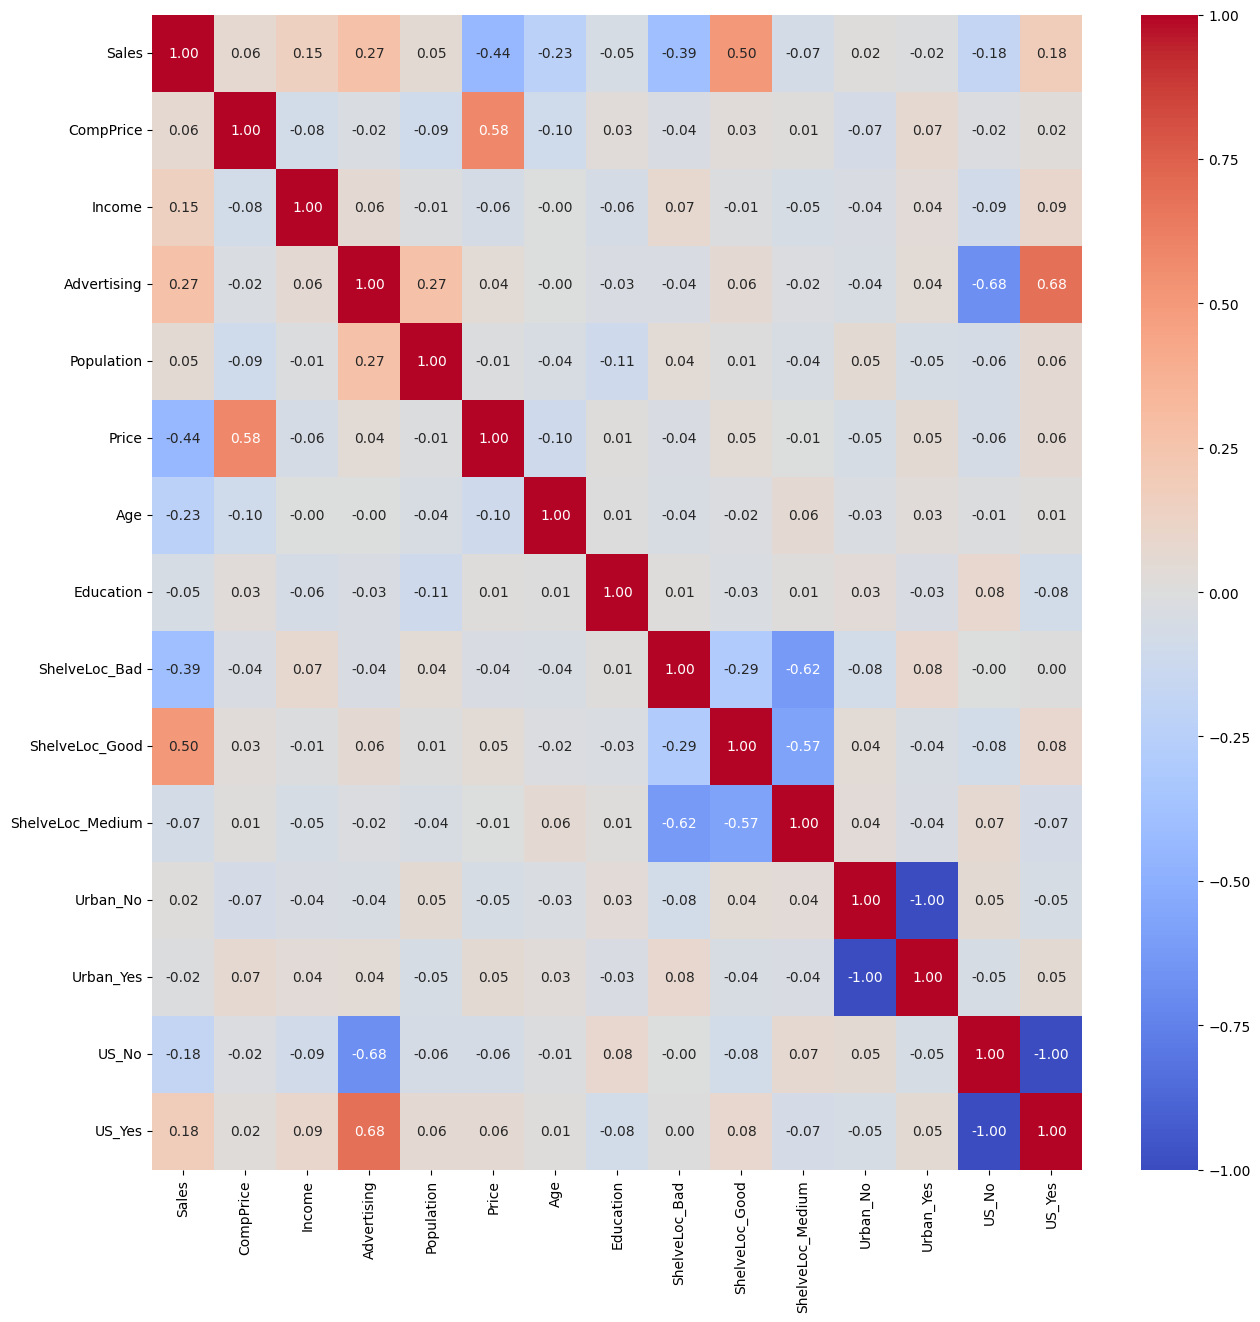

In [11]:
# Create a heatmap of the correlation
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

In [12]:
# Function for visualizign features with high correlation
def visualize_high_correlation(df, pos_threshold=0.5, neg_threshold=-0.5):
    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Iterate through all feature pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            
            correlation_coefficient = corr_matrix.iloc[i, j]

            # Check if correlation is above the positive threshold or below the negative threshold
            if abs(correlation_coefficient) > max(pos_threshold, abs(neg_threshold)):
                # Create a scatter plot
                sns.scatterplot(x=df[feature1], y=df[feature2])
                plt.title(f'Scatter Plot of {feature1} vs {feature2} (Correlation: {correlation_coefficient:.2f})')
                plt.xlabel(feature1)
                plt.ylabel(feature2)
                plt.show()

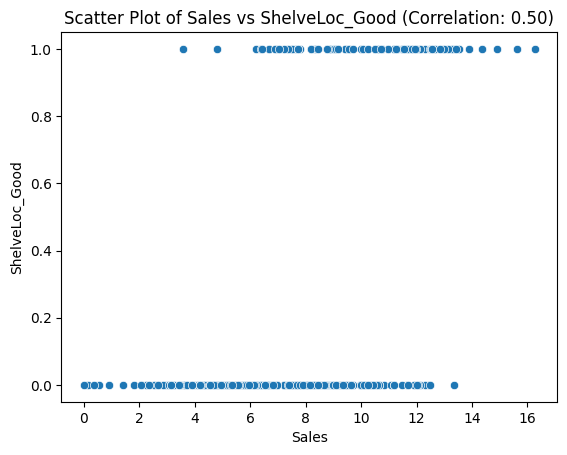

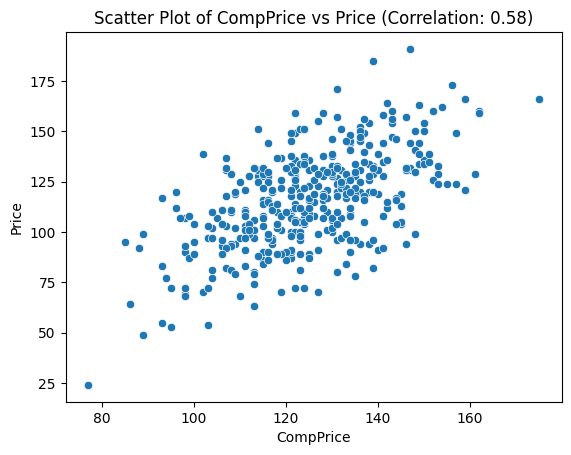

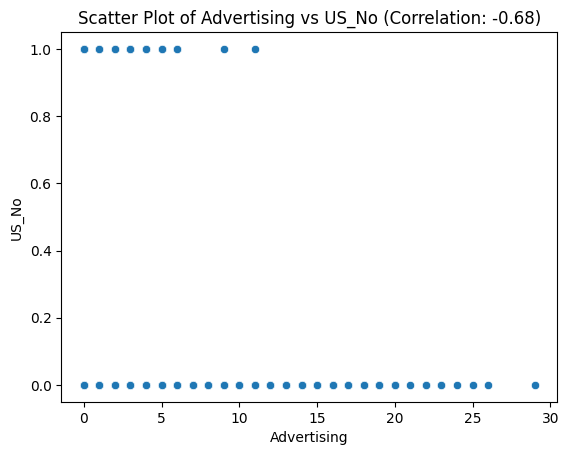

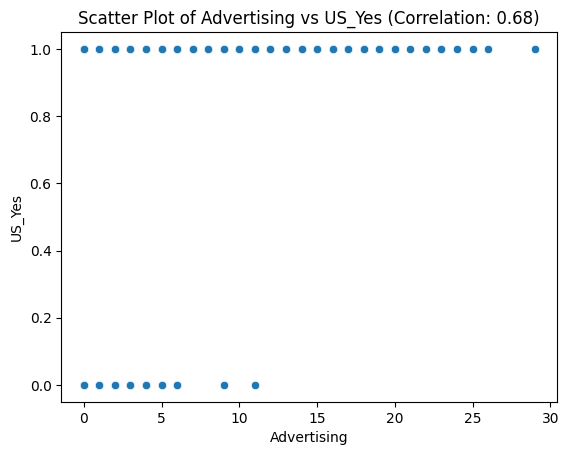

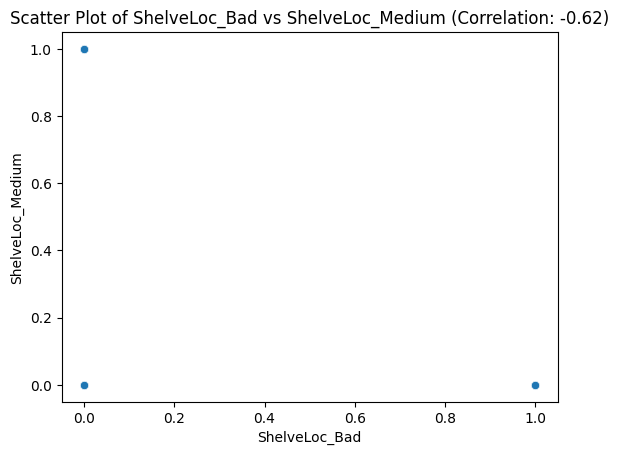

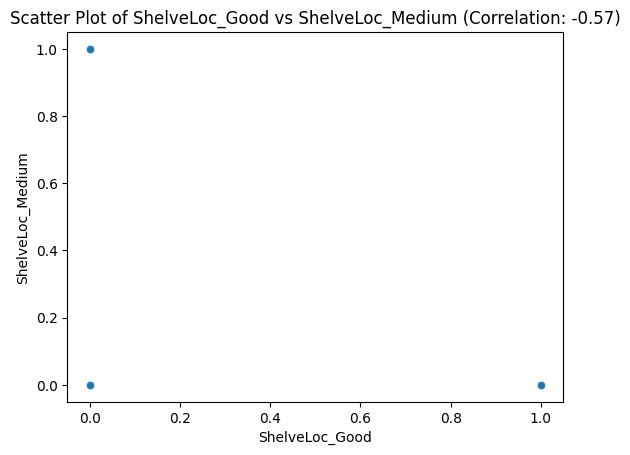

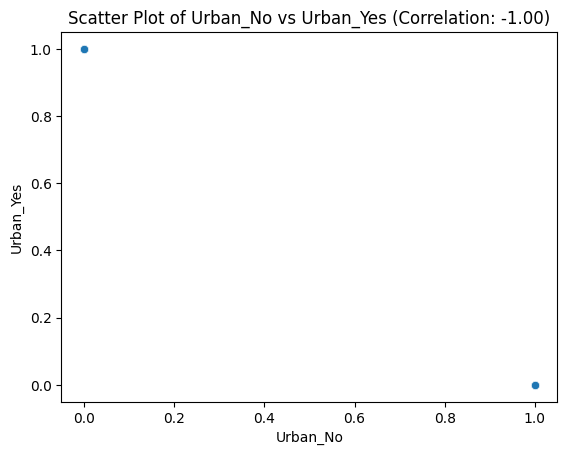

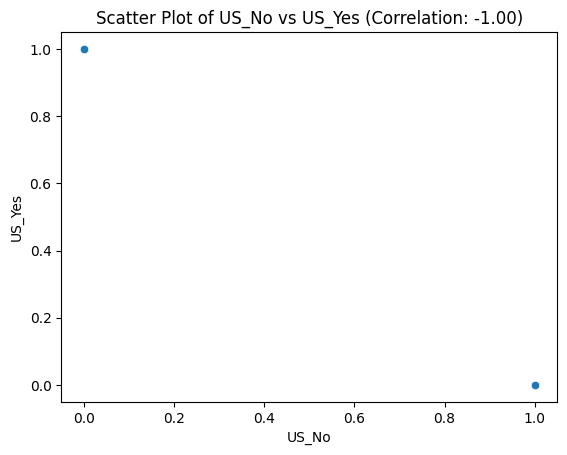

In [13]:
visualize_high_correlation(df_clean)

In [14]:
# Creating new feature to handle colinearity
df_clean["PriceDiff"] = df_clean["Price"] - df_clean["CompPrice"]
df_clean.drop(columns=['CompPrice', 'Price'], inplace=True)
df_clean.head()

,Sales,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff
0,9.50,73,11,276,42,17,1,0,0,0,1,0,1,-18
1,11.22,48,16,260,65,10,0,1,0,0,1,0,1,-28
2,10.06,35,10,269,59,12,0,0,1,0,1,0,1,-33
3,7.40,100,4,466,55,14,0,0,1,0,1,0,1,-20
4,4.15,64,3,340,38,13,1,0,0,0,1,1,0,-13


In [15]:
# Checking correlation for the new feature 
corr_PD = df_clean[['Sales', 'PriceDiff']]
corr_PD.corr()

,Sales,PriceDiff
Sales,1.000000,-0.597922
PriceDiff,-0.597922,1.000000


### High vs. Low Sales Classification

In [16]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Priting the model name
    print(f"\033[34m{model_name}\033[0m")

    # Print the classification report
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))
    print(f" \033[32mConfusion Matrix:\033[0m")
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

`Handling Data`

In [17]:
# Copy for classification
df_clf = df_clean.copy()
df_clf.head()

,Sales,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff
0,9.50,73,11,276,42,17,1,0,0,0,1,0,1,-18
1,11.22,48,16,260,65,10,0,1,0,0,1,0,1,-28
2,10.06,35,10,269,59,12,0,0,1,0,1,0,1,-33
3,7.40,100,4,466,55,14,0,0,1,0,1,0,1,-20
4,4.15,64,3,340,38,13,1,0,0,0,1,1,0,-13


In [18]:
# Creating a new binary efature based on 'Sales'
df_clf['Sales_Category'] = df_clf['Sales'].apply(lambda x: 1 if x > 8 else 0)
df_clf.drop(columns=['Sales'], inplace=True)
df_clf.head()

,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff,Sales_Category
0,73,11,276,42,17,1,0,0,0,1,0,1,-18,1
1,48,16,260,65,10,0,1,0,0,1,0,1,-28,1
2,35,10,269,59,12,0,0,1,0,1,0,1,-33,1
3,100,4,466,55,14,0,0,1,0,1,0,1,-20,0
4,64,3,340,38,13,1,0,0,0,1,1,0,-13,0


In [19]:
# Defining dependent and independent features 
X_clf = df_clf.drop(columns=['Sales_Category'])
y_clf = df_clf['Sales_Category']


X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf ,y_clf , test_size = 0.3 , random_state = 45)
print(X_train_clf.shape,X_test_clf.shape,y_train_clf.shape,y_test_clf.shape)

(280, 13) (120, 13) (280,) (120,)


`Logistic Regression`

In [20]:
# Initialising Logist Regression
lr = LogisticRegression(max_iter=100000, random_state=9)
lr.fit(X_train_clf, y_train_clf)

LogisticRegression(max_iter=100000, random_state=9)

LogisticRegression(max_iter=100000, random_state=9)
 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        70
           1       0.93      0.84      0.88        50

    accuracy                           0.91       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120

 Confusion Matrix:


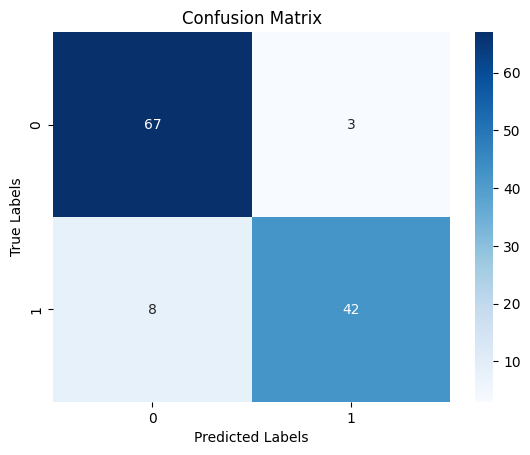

In [21]:
# Evaluating the results 
y_pred_lr = lr.predict(X_test_clf)
evaluate(y_test_clf, y_pred_lr, lr)

`Random Forest`

In [22]:
# Initialising Random Forest
rf_clf = RandomForestClassifier(random_state=9)
rf_clf.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=9)

RandomForestClassifier(random_state=9)
 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        70
           1       0.91      0.80      0.85        50

    accuracy                           0.88       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.88      0.88       120

 Confusion Matrix:


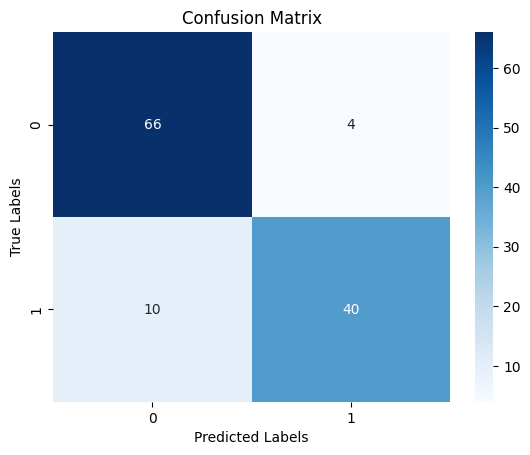

In [23]:
# Evaluating the results 
y_pred_rf_clf = rf_clf.predict(X_test_clf)
evaluate(y_test_clf, y_pred_rf_clf, rf_clf)

`Decision Trees`

In [24]:
# Initialising Random Forest
dt_clf = DecisionTreeClassifier(random_state=9)
dt_clf.fit(X_train_clf, y_train_clf)

DecisionTreeClassifier(random_state=9)

DecisionTreeClassifier(random_state=9)
 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        70
           1       0.72      0.72      0.72        50

    accuracy                           0.77       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.77      0.77      0.77       120

 Confusion Matrix:


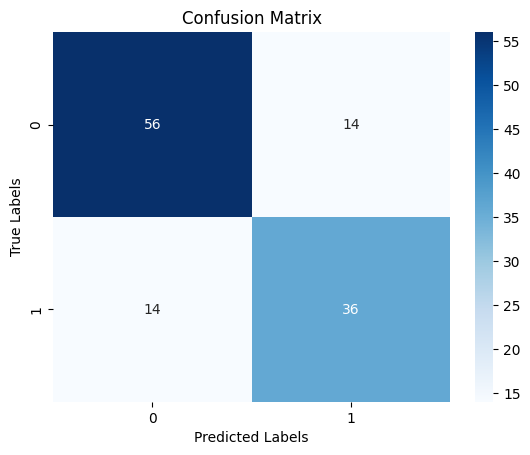

In [25]:
# Evaluating the results 
y_pred_dt_clf = dt_clf.predict(X_test_clf)
evaluate(y_test_clf, y_pred_dt_clf, dt_clf)

`XGBoost`

In [26]:
# Initialising Random Forest
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_clf, y_train_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        70
           1       0.80      0.82      0.81        50

    accuracy                           0.84       120


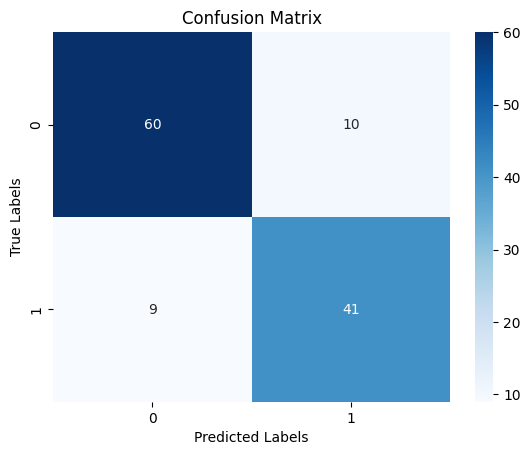

In [27]:
# Evaluating the results 
y_pred_xgb_clf = xgb_clf.predict(X_test_clf)
evaluate(y_test_clf, y_pred_xgb_clf, xgb_clf)

`Feature Evaluation`

In [28]:
# Convert y_pred_lr to a DataFrame
predicted_df = pd.DataFrame({'Predicted_Sales_Category': y_pred_lr})
predicted_df.head()

,Predicted_Sales_Category
0,1
1,1
2,0
3,1
4,0


In [29]:
# Filter predicted_df for High Sales and Low Sales separately
high_sales_df = predicted_df[predicted_df['Predicted_Sales_Category'] == 1]
low_sales_df = predicted_df[predicted_df['Predicted_Sales_Category'] == 0]

In [30]:
# Obtaining orignal features for the overperforming stores
high_sales_df = pd.merge(high_sales_df, df, left_index=True, right_index=True)
high_sales_df['PriceDiff'] = high_sales_df['Price'] - high_sales_df['CompPrice']
high_sales_df.head()

,Predicted_Sales_Category,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,PriceDiff
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,-18
1,1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,-28
3,1,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,-20
10,1,9.01,121,78,9,150,100,Bad,26,10,No,Yes,-21
11,1,11.96,117,94,4,503,94,Good,50,13,Yes,Yes,-23


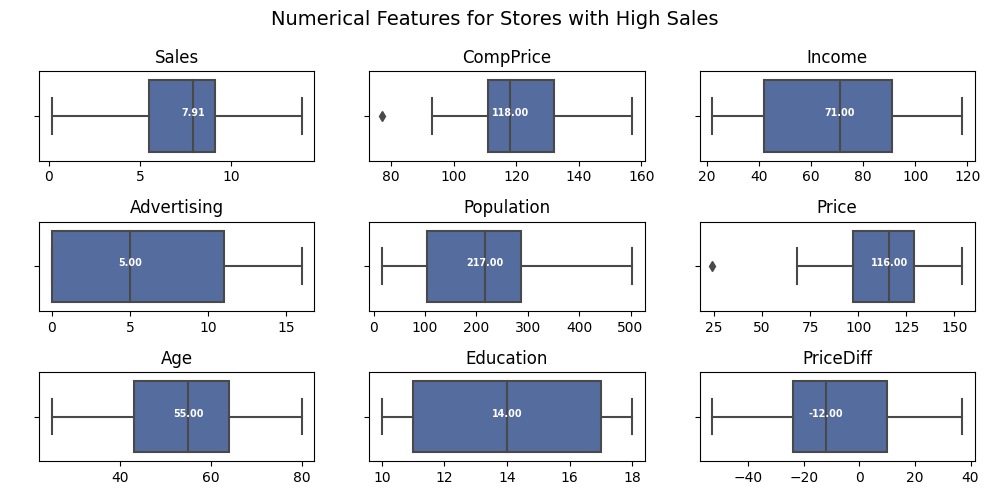

In [31]:
# Visualising the numerical features for stores with high sales
num_features_high = high_sales_df.drop(columns='Predicted_Sales_Category').select_dtypes(["float64", "int64"])

fig = plt.figure(figsize=(10, 5))

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(num_features_high):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for boxplots
    ax = sns.boxplot(data=num_features_high, x=j, color=custom_color)
    
    # Calculate median for all customers
    median = high_sales_df[j].median()
    
    # Plot median in the graph with formatting
    ax.text(median, ax.get_yticks(), s='{:.2f}'.format(median), horizontalalignment='center',
            size='x-small', color='w', weight='semibold')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.suptitle('Numerical Features for Stores with High Sales', fontsize=14)
plt.tight_layout()
plt.show()

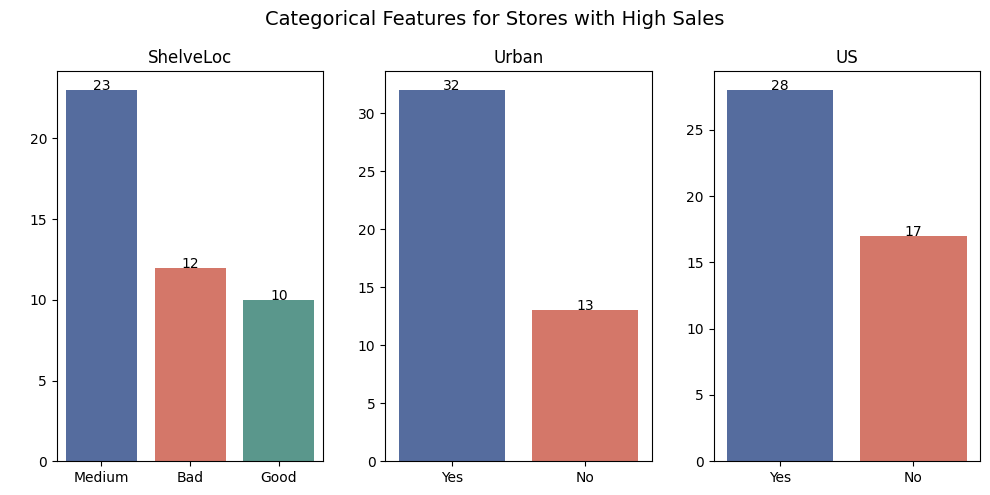

In [32]:
# Visualizing categorical features for stores with high sales
cat_features = high_sales_df.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

fig = plt.figure(figsize=(10, 5))

for i, j in enumerate(cat_features):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_high_sales_df = high_sales_df[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot using the custom color palette
    ax = sns.barplot(data=value_counts_high_sales_df, x=value_counts_high_sales_df.index, y=j, palette=custom_palette)
    
    # Create text annotations
    text = value_counts_high_sales_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.suptitle('Categorical Features for Stores with High Sales', fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
# Obtaining orignal features for the overperforming stores
low_sales_df = pd.merge(low_sales_df, df, left_index=True, right_index=True)
low_sales_df['PriceDiff'] = low_sales_df['Price'] - low_sales_df['CompPrice']
low_sales_df.head()

,Predicted_Sales_Category,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,PriceDiff
2,0,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,-33
4,0,4.15,141,64,3,340,128,Bad,38,13,Yes,No,-13
5,0,10.81,124,113,13,501,72,Bad,78,16,No,Yes,-52
6,0,6.63,115,105,0,45,108,Medium,71,15,Yes,No,-7
7,0,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,-16


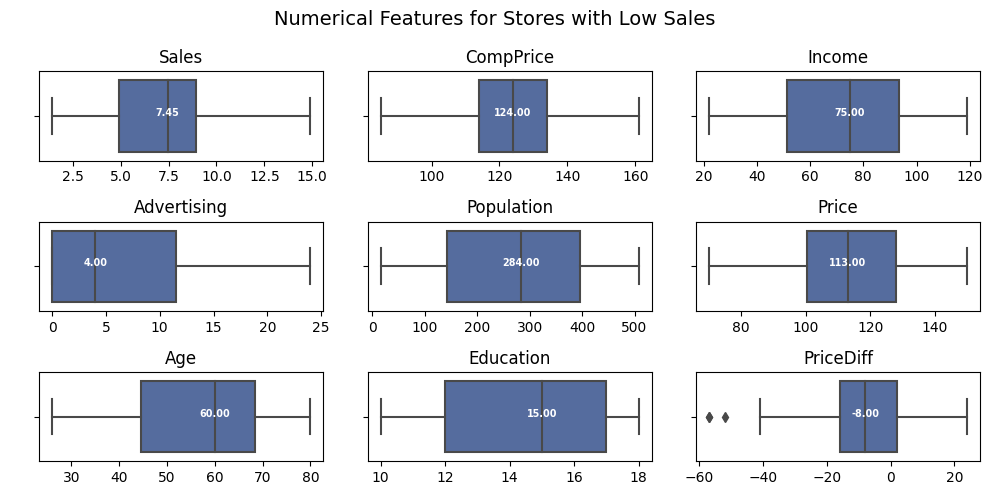

In [34]:
# Visualising the numerical features for stores with low sales
num_features_low = low_sales_df.drop(columns='Predicted_Sales_Category').select_dtypes(["float64", "int64"])

fig = plt.figure(figsize=(10, 5))

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(num_features_low):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for boxplots
    ax = sns.boxplot(data=num_features_low, x=j, color=custom_color)
    
    # Calculate median for all customers
    median = low_sales_df[j].median()
    
    # Plot median in the graph with formatting
    ax.text(median, ax.get_yticks(), s='{:.2f}'.format(median), horizontalalignment='center',
            size='x-small', color='w', weight='semibold')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.suptitle('Numerical Features for Stores with Low Sales', fontsize=14)
plt.tight_layout()
plt.show()

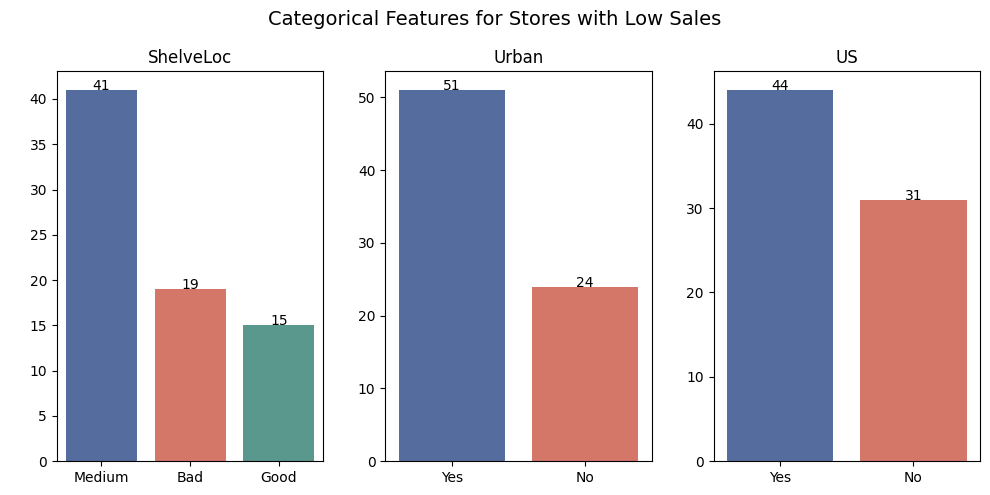

In [35]:
# Visualizing categorical features for stores with low sales
cat_features_low = low_sales_df.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

fig = plt.figure(figsize=(10, 5))

for i, j in enumerate(cat_features_low):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_low_sales_df = low_sales_df[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot using the custom color palette
    ax = sns.barplot(data=value_counts_low_sales_df, x=value_counts_low_sales_df.index, y=j, palette=custom_palette)
    
    # Create text annotations
    text = value_counts_low_sales_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.suptitle('Categorical Features for Stores with Low Sales', fontsize=14)
plt.tight_layout()
plt.show()

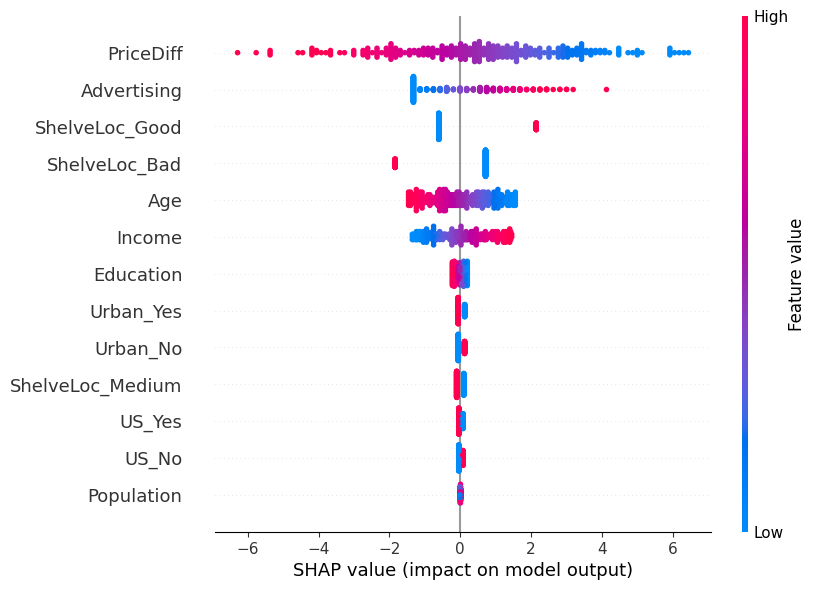

In [36]:
# Create an explainer object using the trained logistic regression model and the training data
explainer = shap.Explainer(lr, X_train_clf)

# Calculate SHAP values for all of the training data
shap_values = explainer(X_train_clf)

# Summary plot to visualize feature importance based on SHAP values
shap.plots.beeswarm(shap_values, max_display=15, order=shap_values.abs.max(0))

### Sales Prediction

In [37]:
def evaluate_regression(y_true, y_pred, model_name):
    # Calculating evaluation metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Printing the model name
    print(f"\033[34m{model_name}\033[0m")

    # Printing the evaluation metrics
    print(f" \033[32mMean Squared Error:\033[0m {mse:.4f}")
    print(f" \033[32mMean Absolute Error:\033[0m {mae:.4f}")
    print(f" \033[32mR-squared (R2):\033[0m {r2:.4f}")

    return mse, mae, r2

`Handling Data`

In [38]:
df_pr = df_clean.copy()
df_pr.head()

,Sales,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff
0,9.50,73,11,276,42,17,1,0,0,0,1,0,1,-18
1,11.22,48,16,260,65,10,0,1,0,0,1,0,1,-28
2,10.06,35,10,269,59,12,0,0,1,0,1,0,1,-33
3,7.40,100,4,466,55,14,0,0,1,0,1,0,1,-20
4,4.15,64,3,340,38,13,1,0,0,0,1,1,0,-13


In [39]:
# Defining dependent and independent features 
X = df_pr.drop(columns=['Sales'])
y = df_pr['Sales']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 45)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 13) (80, 13) (320,) (80,)


`Linear Regression`

In [40]:
# Initialising Linear regression 
osl = LinearRegression()
osl.fit(X_train, y_train)

LinearRegression()

In [41]:
# Evaluating the results 
y_pred_osl = osl.predict(X_test)
evaluate_regression(y_test, y_pred_osl, osl)

LinearRegression()
 Mean Squared Error: 1.0767
 Mean Absolute Error: 0.8264
 R-squared (R2): 0.8272


(1.0766750137260068, 0.8264207517153824, 0.8271514509500234)

`DecisionTrees`

In [42]:
# Initialise DecisionTree Regressor
dt = DecisionTreeRegressor(random_state=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [43]:
# Evaluating the results 
y_pred_dt = dt.predict(X_test)
evaluate_regression(y_test, y_pred_dt, dt)

DecisionTreeRegressor(random_state=10)
 Mean Squared Error: 2.8799
 Mean Absolute Error: 1.3842
 R-squared (R2): 0.5377


(2.879879999999999, 1.38425, 0.537666358843614)

`Random Forest`

In [44]:
# Initialise Random Forest
rf = RandomForestRegressor(random_state=10)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [45]:
# Evaluating the results 
y_pred_rf = rf.predict(X_test)
evaluate_regression(y_test, y_pred_rf, rf)

RandomForestRegressor(random_state=10)
 Mean Squared Error: 1.7553
 Mean Absolute Error: 1.0545
 R-squared (R2): 0.7182


(1.7552504496249994, 1.0545162499999998, 0.7182134910077816)

`XGBoost`

In [46]:
# Initialise XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
# Evaluating the results 
y_pred_xgb = xgb.predict(X_test)
evaluate_regression(y_test, y_pred_xgb, xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
 Mean Squared Error: 1.9223
 Mean Absolute Error: 1.1129
 R-squared (R2): 0.6914


(1.922271065369674, 1.1128517363071442, 0.6914001344007643)

`Detecting Store Sales Potential`

In [48]:
# Create an index representing the store numbers (based on row numbers)
store_numbers = np.arange(1, len(y_test) + 1)

# Convert y_test, predicted_sales, and store_numbers to a DataFrame
sales_data = {
    'Store Numbers': store_numbers,
    'True Sales': y_test,
    'Predicted Sales': y_pred_osl
}

sales_df = pd.DataFrame(sales_data)

# Display the DataFrame
sales_df.head()

,Store Numbers,True Sales,Predicted Sales
255,1,7.71,7.776605
346,2,8.97,7.732829
228,3,5.40,5.149481
384,4,12.85,12.174810
269,5,5.01,5.501342


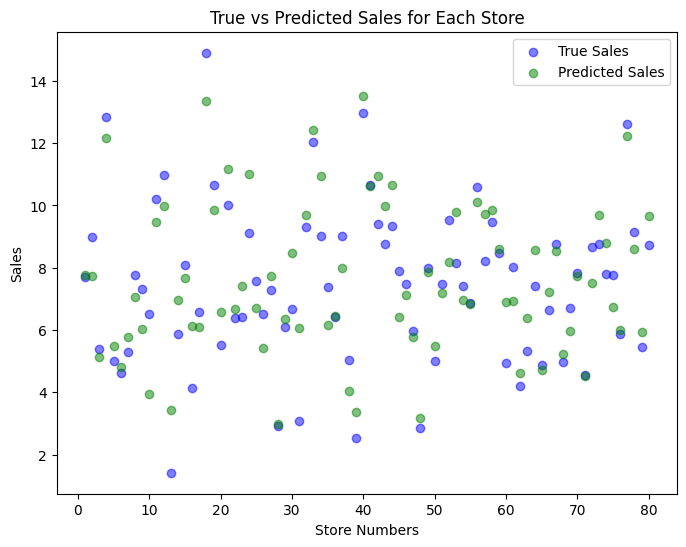

In [49]:
# Plotting true sales and predicted sales for each store
plt.figure(figsize=(8, 6))

# True Sales (Red)
plt.scatter(sales_df['Store Numbers'], sales_df['True Sales'], color='blue', alpha=0.5, label='True Sales')

# Predicted Sales (Blue)
plt.scatter(sales_df['Store Numbers'], sales_df['Predicted Sales'], color='green', alpha=0.5, label='Predicted Sales')

plt.title('True vs Predicted Sales for Each Store')
plt.xlabel('Store Numbers')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [50]:
# Calculating amount of under- and overperforming stores
sales_df['Difference'] = sales_df['Predicted Sales'] - sales_df['True Sales']
sales_df.head()

,Store Numbers,True Sales,Predicted Sales,Difference
255,1,7.71,7.776605,0.066605
346,2,8.97,7.732829,-1.237171
228,3,5.40,5.149481,-0.250519
384,4,12.85,12.174810,-0.675190
269,5,5.01,5.501342,0.491342


In [51]:
# Count the occurrences of under, over, and accurate predictions
under = sum(sales_df['Difference'] < 0)
over = sum(sales_df['Difference'] > 0)
accurate = sum(sales_df['Difference'] == 0)

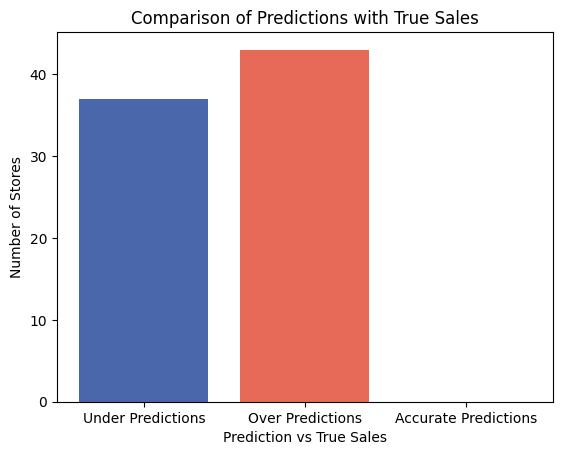

In [52]:
# Custom color scheme
custom_palette = ['#4967AA', '#E66A57', '#50A192']

# Create a bar plot 
plt.bar(['Under Predictions', 'Over Predictions', 'Accurate Predictions'], [under, over, accurate], color=custom_palette)
plt.xlabel('Prediction vs True Sales')
plt.ylabel('Number of Stores')
plt.title('Comparison of Predictions with True Sales')
plt.show()